In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Importing dataset - the generated simulator data
data = pd.read_csv('./data/telemetries.csv', delimiter=",")
data.head()

,container_id,measurement_time,product_id,temperature,target_temperature,ambiant_temperature,kilowatts,time_door_open,content_type,defrost_cycle,oxygen_level,nitrogen_level,humidity_level,carbon_dioxide_level,vent_1,vent_2,vent_3,maintenance_required
0,C01,2019-09-27 21:54:02.041910,P02,5.801218,6,19.293892,1.414317,0.093343,2,6,21.488868,77.557735,58.577669,3.967578,True,True,True,0
1,C01,2019-09-27 21:59:02.041910,P02,8.139679,6,19.879705,2.084797,1.195522,2,6,21.937200,79.670586,60.152467,4.259016,True,True,True,0
2,C01,2019-09-27 22:04:02.041910,P02,4.656885,6,20.075523,2.175846,1.660254,2,6,19.944081,76.443221,58.927658,2.909839,True,True,True,0
3,C01,2019-09-27 22:09:02.041910,P02,7.994605,6,20.523734,3.265800,0.866216,2,5,20.705276,78.670985,60.702761,3.740478,True,True,True,0
4,C01,2019-09-27 22:14:02.041910,P02,6.677899,6,19.465233,3.549412,0.553271,2,3,20.414611,77.216359,59.876666,3.859622,True,True,True,0


In [3]:
# Convert dataset into array for the independent variables (features)
X = np.asarray(data[['temperature','target_temperature','ambiant_temperature','oxygen_level','carbon_dioxide_level','humidity_level','nitrogen_level','vent_1','vent_2','vent_3','kilowatts','content_type','time_door_open','maintenance_required','defrost_cycle']])
X[0:5]

array([[5.801218101039296, 6, 19.293892162851392, 21.488868091125628,
        3.9675781469739313, 58.57766853778072, 77.5577346448344, True,
        True, True, 1.4143165258079469, 2, 0.09334288963665427, 0, 6],
       [8.139679180971088, 6, 19.87970528601639, 21.937200152599225,
        4.259015540335309, 60.15246724731424, 79.67058556875925, True,
        True, True, 2.084797485117284, 2, 1.1955217552324195, 0, 6],
       [4.656885317550969, 6, 20.075522821805052, 19.94408125476384,
        2.9098393122905755, 58.9276575051969, 76.4432213124181, True,
        True, True, 2.1758457919224545, 2, 1.6602539867936046, 0, 6],
       [7.994605312622799, 6, 20.523734411015692, 20.705275848531645,
        3.740477993264582, 60.702761422484514, 78.67098541815523, True,
        True, True, 3.2657995708778937, 2, 0.8662160581206455, 0, 5],
       [6.677899073907494, 6, 19.465232505640827, 20.41461138285295,
        3.859622001609912, 59.87666604626664, 77.21635894583027, True,
        True, True

In [4]:
# Convert dataset into array for the dependent (objective) variables
y = np.asarray(data['maintenance_required'])
y [0:5]

array([0, 0, 0, 0, 0])

In [5]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.21417791,  0.        , -0.70454156,  0.40096851, -0.15885105,
        -1.41870193, -0.4709387 ,  0.14040826,  0.14040826,  0.14040826,
        -1.15454468,  0.        , -0.93907679, -0.23813884,  1.35699153],
       [ 2.08838023,  0.        , -0.12736646,  0.66445228,  0.00905081,
         0.17421205,  1.66131592,  0.14040826,  0.14040826,  0.14040826,
        -0.52696427,  0.        ,  0.17618315, -0.23813884,  1.35699153],
       [-1.34094148,  0.        ,  0.06556368, -0.50689932, -0.76823172,
        -1.06468696, -1.59568733,  0.14040826,  0.14040826,  0.14040826,
        -0.44174166,  0.        ,  0.64643099, -0.23813884,  1.35699153],
       [ 1.94553372,  0.        ,  0.50716623, -0.05954693, -0.28968717,
         0.73083639,  0.65253579,  0.14040826,  0.14040826,  0.14040826,
         0.5784717 ,  0.        , -0.15703087, -0.23813884,  0.4577261 ],
       [ 0.64904318,  0.        , -0.53572769, -0.2303698 , -0.22104635,
        -0.10476176, -0.81544947,  0.14040826, 

In [6]:
## split the dataset into train and test to estiamte model accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2400, 15) (2400,)
Test set: (600, 15) (600,)


In [7]:
## As we are trying to acheive a binary classification, we use Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
## Predict using the trained LR model
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.90266541, 0.09733459],
       [0.83933223, 0.16066777],
       [0.90513623, 0.09486377],
       ...,
       [0.90826533, 0.09173467],
       [0.92517656, 0.07482344],
       [0.90737326, 0.09262674]])

In [10]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

1.0

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[ 40   0]
 [  0 560]]
[[ 40   0]
 [  0 560]]


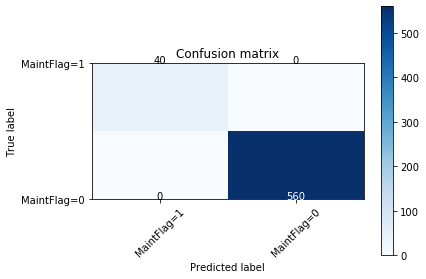

In [12]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MaintFlag=1','MaintFlag=0'],normalize= False,  title='Confusion matrix')

In [13]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00        40

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [14]:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)


0.09214778391001624

In [15]:
import pickle

#serializing our model to a file called model_logistic_regression.pkl
pickle.dump(LR, open("model_logistic_regression.pkl","wb"))